In [85]:
import pandas as pd
import math
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sys import maxsize

data=pd.read_csv('face feature vectors.csv')

train_data=pd.DataFrame()
test_data=pd.DataFrame()


In [86]:
d1=data[0:5]
d2=data[400:405]
test_data=pd.concat([d1,d2])

d3=data[5:400]
d4=data[405:800]
train_data=pd.concat([d3,d4])

In [87]:
p1=len(d3)/len(train_data)
p2=len(d4)/len(train_data)


z=test_data.iloc[:,1]
print(z)
d=len(train_data.columns)-2


0        male
1        male
2        male
3        male
4        male
400    female
401    female
402    female
403    female
404    female
Name: Unnamed: 1, dtype: object


In [88]:
mean1=[]
for i in range(0,128):
    a=str(i)
    mean1.append(np.mean(d3[a]))
mean1=np.array(mean1)

mean2=[]
for i in range(128):
    a=str(i)
    mean2.append(np.mean(d4[a]))
mean2=np.array(mean2)

d6=pd.DataFrame()
d7=pd.DataFrame()

d6=d3.iloc[:,2:130]
d7=d4.iloc[:,2:130]

cov1=d6.cov()
cov2=d7.cov()

In [89]:
mat=np.linalg.det(cov1)
if(mat==0):
    mat=maxsize
print(mat)

9223372036854775807


In [90]:
mat1=np.linalg.det(cov2)
if(mat1==0):
    mat1=maxsize
print(mat1)


9223372036854775807


In [91]:
def discriminant(x,mean,cov2,cov1,p):
    a=1/((2*math.pi)**(d/2))
    b=1/(np.power(cov2,1/2))
    c= (-1/2)*(np.dot(np.dot((x-mean).T,np.linalg.inv(cov1)),(x-mean)))
    return a*b*math.exp(c)*p  

k=[]

for i in range(len(test_data)):
    l=[]
    x=test_data.iloc[i][0:130]
    x=np.array(x)
    X=x[2:130]
    X=np.array(X)
    g1=discriminant(X,mean1,mat,cov1,p1)
    l.append(g1)
    g2=discriminant(X,mean2,mat1,cov2,p2)
    l.append(g2)
    y=np.argmax(l)
    if(y==0):
        k.append([x[0],'male'])
    if(y==1):
        k.append([x[0],'female'])
    
   
   

In [95]:

k=pd.DataFrame(k,columns=['Id','class'])
k.to_csv('output.csv',index=False)

#accuracy
count=0
count1=[0,0]

for i in range(len(test_data)):
    if(z.iloc[i]==k.iloc[i]['class']):
        if(z.iloc[i]=='male'):
            count1[0]+=1
        if(z.iloc[i]=='female'):
            count1[1]+=1
        count=count+1
print("Accuracy is ",count/len(test_data)*100)


Accuracy is  90.0


In [93]:

count1.append(count)


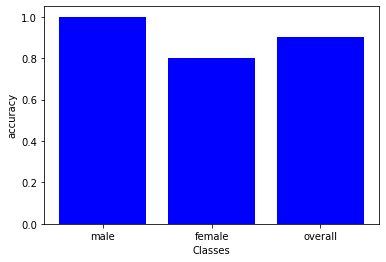

In [94]:
dict1={'male':count1[0]/len(d1),'female':count1[1]/len(d2),'overall':count1[2]/len(test_data)}
labels = list(dict1.keys())
values = list(dict1.values())
plt.bar(labels, values, color='blue')
plt.xlabel('Classes')
plt.ylabel('accuracy')

plt.show()